In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from numpy import nan
import seaborn as sns

path="/Users/xing/Desktop/test/"
filename=path+"full_train.csv"
Data= pd.read_csv(filename)

# string columns
string_cols = ['air_store_id', 'air_genre_name', 'air_area_name', 'hpg_genre_name', 'hpg_area_name',
               'area', 'city', 'street', 'area_genre', 'store_weekday', 
               'store_weekday_holiday','store_week_of_year',
               'store_month_of_year'
              ]

#string_cols = ['air_store_id', 'air_genre_name', 'air_area_name', 'hpg_genre_name', 'hpg_area_name',
#               'area', 'city', 'street']


# Bool columns 
bool_cols = [ 'holiday_flg', 'tomorrow_is_holiday', 'yesterday_is_holiday']

# int columns
int_cols = ['weekday', 'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_startday',            'latitude_air', 'longitude_air',   # location
            'stores_same_street', 'stores_same_city', 'stores_same_area', 
            'reserves', 'reserve_visitors', 'reserve_avg_days_ahead',  # reserves
            'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors',  # simple aggregation of visitors
      #      'mean_week_visitors','median_week_visitors'            # those feature do not any help 
     #       'mean_month_visitors', 'median_month_visitors', 'min_month_visitors', 'max_month_visitors',
           ]

# id columns
id_col = 'id'

# target column
target_col = 'visitors'

#implement  lable encode, so that we can deal with our data using xgboost

#conve string data into number by lable encode
for str_encode in string_cols:
    encoder = LabelEncoder()
    Data[str_encode] = encoder.fit_transform(Data[str_encode].astype(str))
Data[string_cols].head()

FullData = Data.query('dataset=="past"')
future  = Data.query('dataset=="predict"')

FullData.head()

use_cols = string_cols + bool_cols + int_cols

train_date = FullData.visit_date < '2017-03-01'
selector=(FullData.weekday == 4 )

X_train = FullData[train_date][use_cols]
y_train = FullData[train_date][target_col].apply(np.log1p)


val_date = FullData.visit_date >= '2017-03-01'
X_test = FullData[val_date][use_cols]
y_test = FullData[val_date][target_col].apply(np.log1p)

#X_train = pd.DataFrame(data=X_train, columns=use_cols)
#X_val = pd.DataFrame(data=X_val, columns=use_cols)


train_dmatrix = xgb.DMatrix(X_train, label=y_train, missing=nan)
test_dmatrix = xgb.DMatrix(X_test, label=y_test,missing=nan)

eval_setting = [ (train_dmatrix, 'train'), (test_dmatrix, 'eval') ]

FullData[use_cols].head()


/Users/xing/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,air_store_id,air_genre_name,air_area_name,hpg_genre_name,hpg_area_name,area,city,street,area_genre,store_weekday,...,stores_same_street,stores_same_city,stores_same_area,reserves,reserve_visitors,reserve_avg_days_ahead,mean_visitors,median_visitors,min_visitors,max_visitors
0,603,4,62,16,31,7,29,77,144,4222,...,51,61,444,NaN,NaN,NaN,24.095238,25.0,7.0,57.0
1,603,4,62,16,31,7,29,77,144,4223,...,51,61,444,NaN,NaN,NaN,20.450000,21.0,7.0,45.0
2,603,4,62,16,31,7,29,77,144,4224,...,51,61,444,NaN,NaN,NaN,35.218750,35.5,17.0,61.0
3,603,4,62,16,31,7,29,77,144,4225,...,51,61,444,NaN,NaN,NaN,27.828125,27.0,6.0,53.0
4,603,4,62,16,31,7,29,77,144,4220,...,51,61,444,NaN,NaN,NaN,13.754386,12.0,2.0,34.0


Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:2.202392	eval-rmse:2.238377
[1]	train-rmse:1.994526	eval-rmse:2.030042
[2]	train-rmse:1.813113	eval-rmse:1.848381
[3]	train-rmse:1.646671	eval-rmse:1.681254
[4]	train-rmse:1.498577	eval-rmse:1.530779
[5]	train-rmse:1.369604	eval-rmse:1.401990
[6]	train-rmse:1.254958	eval-rmse:1.285109
[7]	train-rmse:1.150766	eval-rmse:1.178115
[8]	train-rmse:1.058736	eval-rmse:1.084348
[9]	train-rmse:0.983602	eval-rmse:1.004847
[10]	train-rmse:0.911939	eval-rmse:0.933519
[11]	train-rmse:0.848959	eval-rmse:0.870533
[12]	train-rmse:0.796782	eval-rmse:0.818880
[13]	train-rmse:0.749304	eval-rmse:0.770225
[14]	train-rmse:0.708449	eval-rmse:0.728495
[15]	train-rmse:0.673495	eval-rmse:0.692512
[16]	train-rmse:0.643609	eval-rmse:0.661830
[17]	train-rmse:0.619907	eval-rmse:0.637934
[18]	train-rmse:0.598442	eval-rmse:0.615411
[19]	train-rmse:0.580461	eval-rmse:0.596460
[20]	train-rmse:0.565427	eval-rmse:0.580736
[21]	train-rmse:0.552577	ev

best_score: 0.495946, best_iteration: 99


/Users/xing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,visitors
252108,air_00a91d42b08b08d9_2017-04-23,1.629209
252109,air_00a91d42b08b08d9_2017-04-24,15.577816
252110,air_00a91d42b08b08d9_2017-04-25,16.849533
252111,air_00a91d42b08b08d9_2017-04-26,25.985250
252112,air_00a91d42b08b08d9_2017-04-27,24.725084


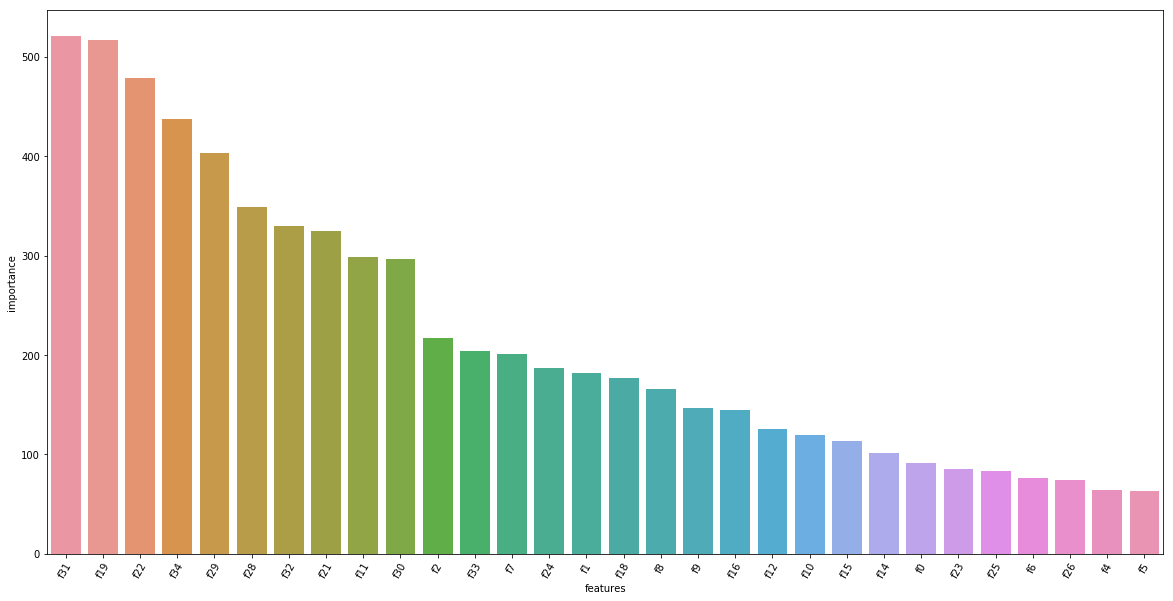

In [2]:
import seaborn as sns

xgb_params = {'colsample_bytree': 0.4,
                  'eta': 0.1,
                  'gamma': 2,
                  'max_depth': 8,
                  'min_child_weight': 200,
                  'objective': 'reg:linear',
                  'silent':1,
                  'seed': 2018 }
#find best iteration
model = xgb.train(params=xgb_params,
                  dtrain=train_dmatrix, 
                  num_boost_round=100, 
                  evals=eval_setting,
                  early_stopping_rounds=50,
                  verbose_eval=50,
                 )


#plot feature importance
featureImportance = model.get_fscore() 
features = pd.DataFrame() 
features['features'] = featureImportance.keys() 
features['importance'] = featureImportance.values() 
features.sort_values(by=['importance'],ascending=False,inplace=True) 
fig,ax= plt.subplots() 
fig.set_size_inches(20,10) 
plt.xticks(rotation=60) 
sns.barplot(data=features.head(30),x='features',y='importance',ax=ax,orient='v') 

best_iteration = model.best_iteration
best_score = model.best_score

print ('best_score: {}, best_iteration: {}'.format(best_score, best_iteration))

#train and predict with best iteration
X_train = FullData[use_cols]
y_train = FullData[target_col].apply(np.log1p)  
model = xgb.train(params=xgb_params, 
                  dtrain=xgb.DMatrix(X_train, label=y_train,missing=nan), 
                  num_boost_round=best_iteration*1,
                 )

future[target_col] = model.predict(xgb.DMatrix(future[use_cols].values,missing=nan))
future[target_col] = future[target_col].apply(np.expm1).clip(lower=0.)
sub = future[[id_col, target_col]].copy()
sub.to_csv(path+'submission_xgbLable.csv', index=False)
sub.head()
